## <font color=Yellow size=20>Manjeel Chalise
KCE080BCT015
</script>

# Wine Quality Prediction 

##  Objective: Predict the quality of wine on a scale (e.g., 0 to 10) based on physicochemical properties such as acidity, pH, alcohol content, and sugar levels.

## Source:https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.columns



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [4]:
df.shape

(1143, 13)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Visualization of the quality of wine on a scale

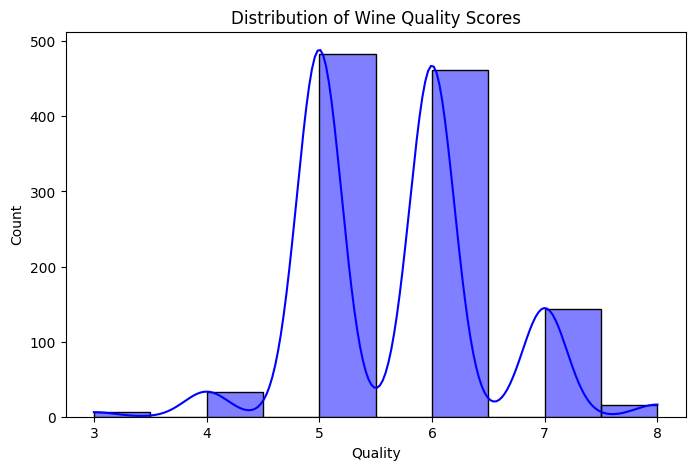

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['quality'], bins=10, kde=True, color='blue')
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

## Conversion of the numerical quality scores into three categories: Bad, Average and Excellent


In [9]:
def categorize_quality(q):
    if q <= 4:
        return "Bad"
    elif 5 <= q <= 6:
        return "Average"
    else:
        return "Excellent"
df['quality_category'] = df['quality'].apply(categorize_quality)
print(df['quality_category'])


0       Average
1       Average
2       Average
3       Average
4       Average
         ...   
1138    Average
1139    Average
1140    Average
1141    Average
1142    Average
Name: quality_category, Length: 1143, dtype: object


In [10]:

category_counts = df['quality_category'].value_counts()
print(category_counts)


quality_category
Average      945
Excellent    159
Bad           39
Name: count, dtype: int64


## Analyzing how the different features affect the quality scores

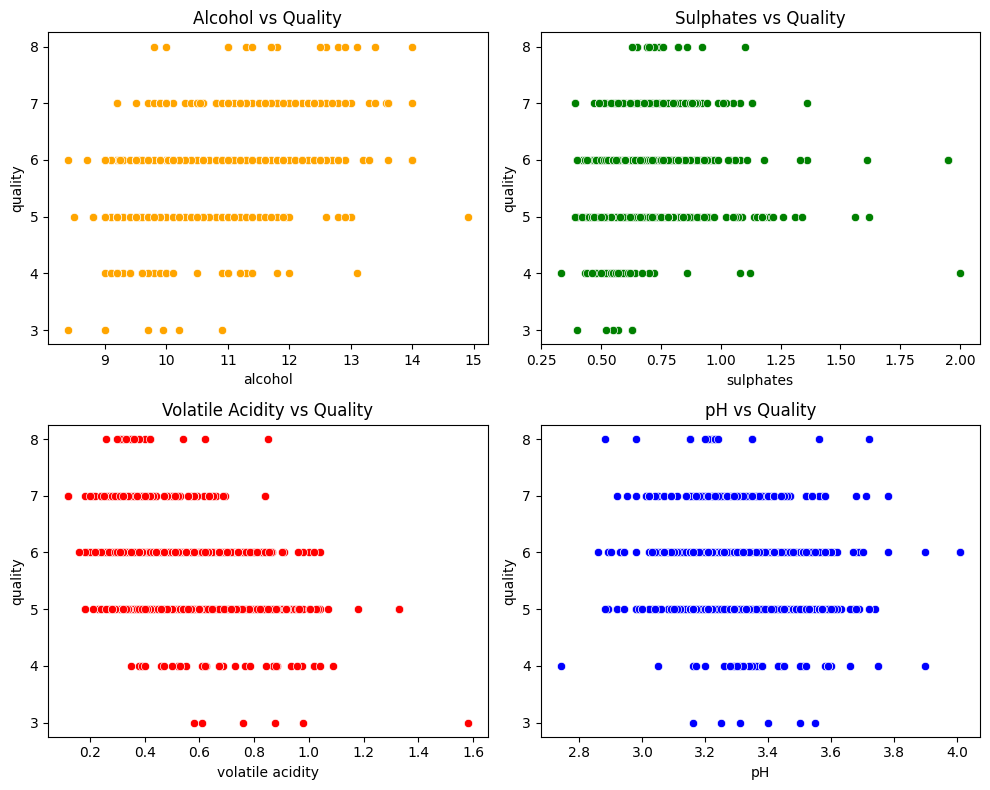

In [46]:
# Plot key features vs. quality
plt.figure(figsize=(10, 8))

# Alcohol vs Quality
plt.subplot(2, 2, 1)
sns.scatterplot(x='alcohol', y='quality', data=df, color='orange')
plt.title('Alcohol vs Quality')

# Sulphates vs Quality
plt.subplot(2, 2, 2)
sns.scatterplot(x='sulphates', y='quality', data=df, color='green')
plt.title('Sulphates vs Quality')

# Volatile Acidity vs Quality
plt.subplot(2, 2, 3)
sns.scatterplot(x='volatile acidity', y='quality', data=df, color='red')
plt.title('Volatile Acidity vs Quality')

# pH vs Quality
plt.subplot(2, 2, 4)
sns.scatterplot(x='pH', y='quality', data=df, color='blue')
plt.title('pH vs Quality')

plt.tight_layout()
plt.show()

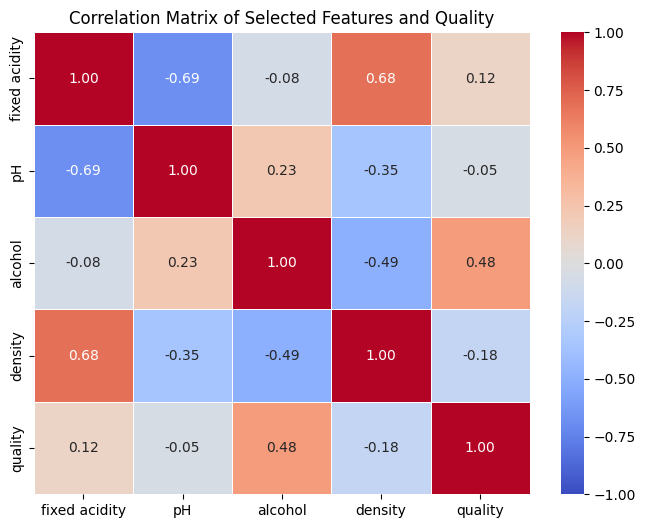

In [63]:

relevant_columns = ['fixed acidity', 'pH', 'alcohol', 'density', 'quality']



relevant_data = df[relevant_columns].copy()

corr_matrix = relevant_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features and Quality')
plt.show()


## Visualization of pairwise relationship between the different features:fixed acidity,ph,alcohol,density

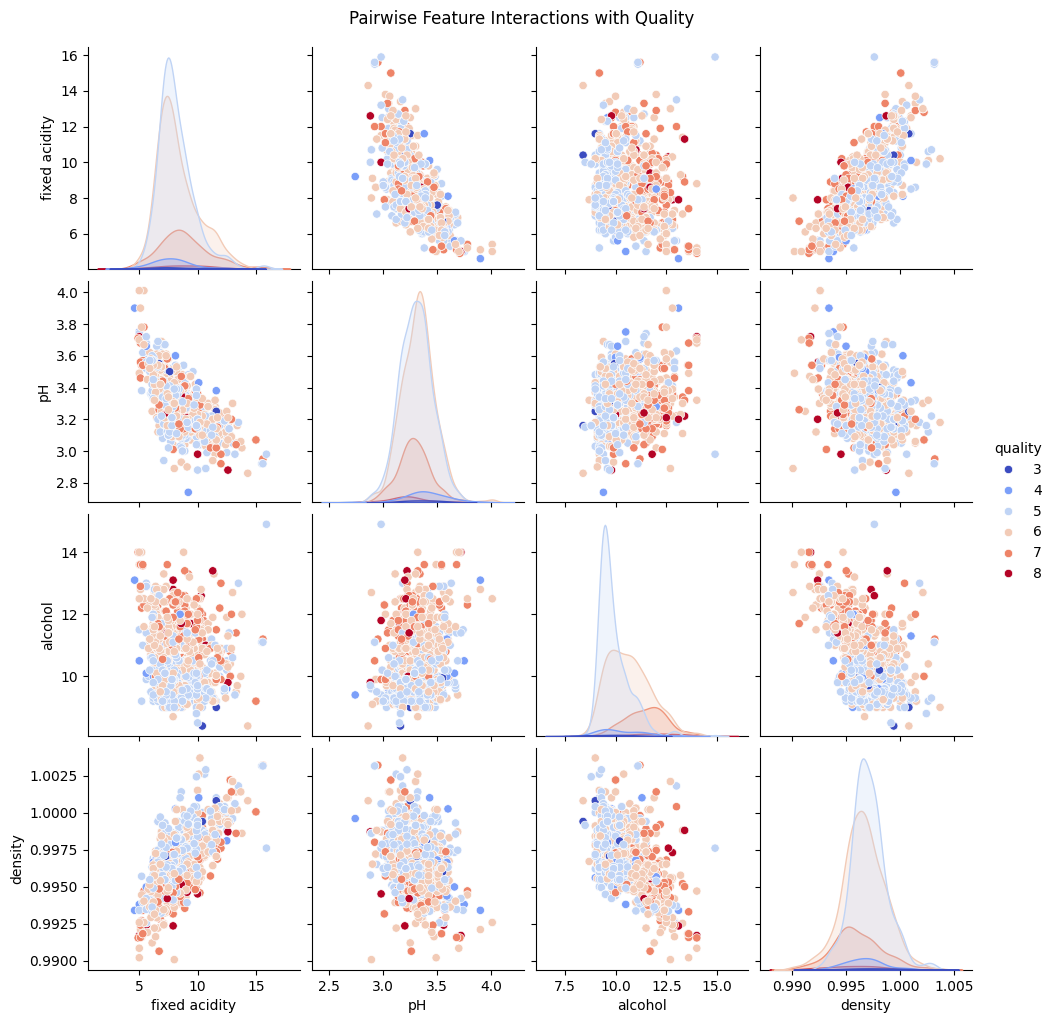

In [ ]:

sns.pairplot(df[['fixed acidity', 'pH', 'alcohol', 'density', 'quality']], hue='quality', palette='coolwarm')
plt.suptitle('Pairwise Feature Interactions with Quality', y=1.02)
plt.show()


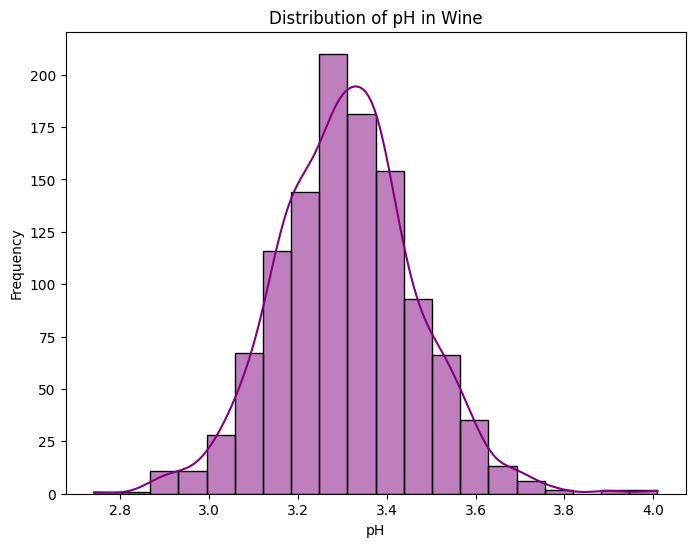

In [52]:
# Histogram to visualize pH distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['pH'], kde=True, color='purple', bins=20)
plt.title('Distribution of pH in Wine')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()


### This shows that most wines have ph in the range of 3.0-4.0

## Acidity composition in the wine(Visualization)

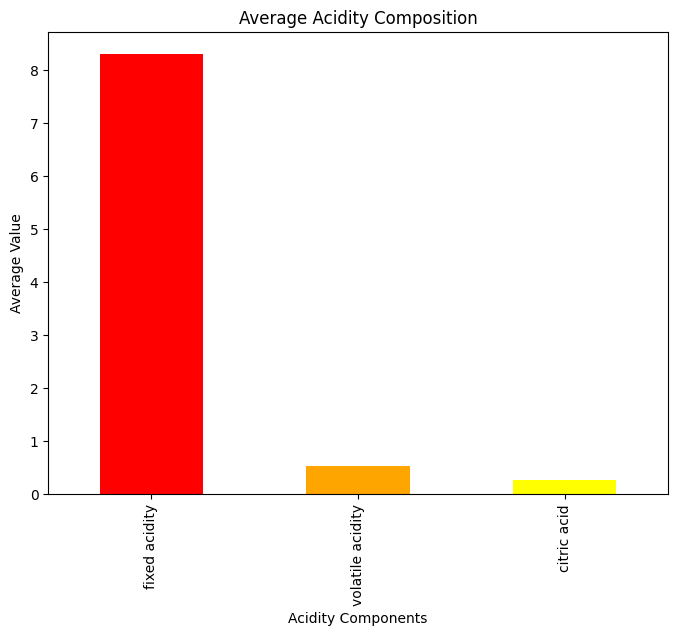

In [53]:
# Bar plot for acidity components
df[['fixed acidity', 'volatile acidity', 'citric acid']].mean().plot(kind='bar', color=['red', 'orange', 'yellow'], figsize=(8, 6))
plt.title('Average Acidity Composition')
plt.xlabel('Acidity Components')
plt.ylabel('Average Value')
plt.show()


## Free sulphur vs total sulfur comparison

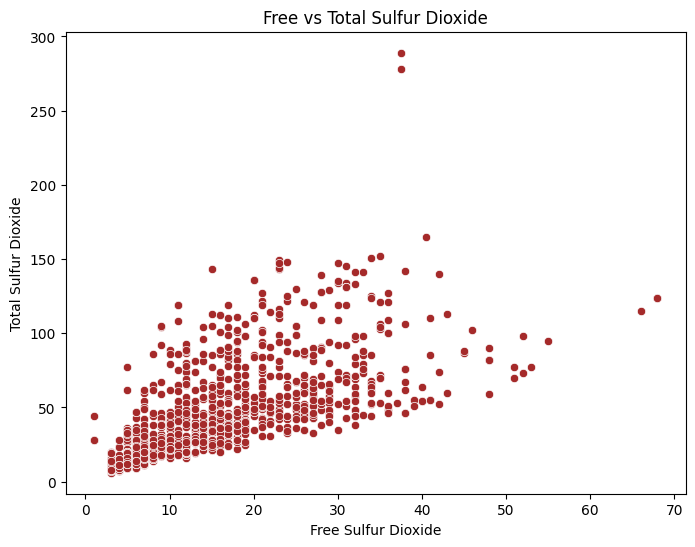

In [54]:
# Scatter plot of free vs total sulfur dioxide
plt.figure(figsize=(8, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', data=df, color='brown')
plt.title('Free vs Total Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.show()


## Density vs Sugar analysis

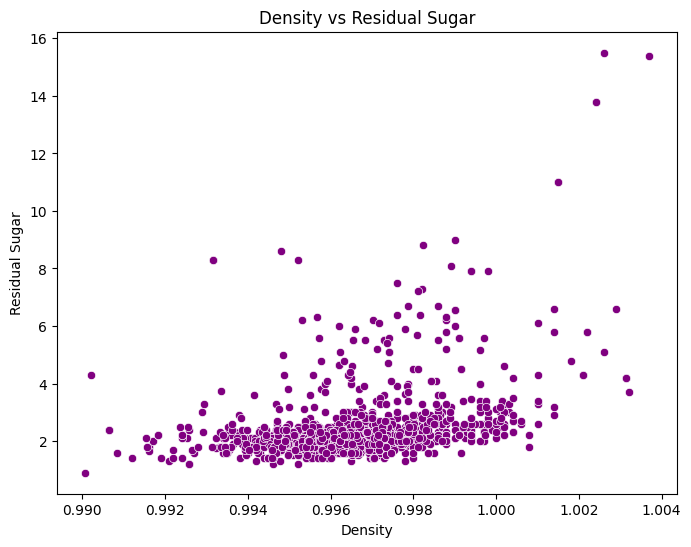

In [55]:
# Scatter plot of density vs residual sugar
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='residual sugar', data=df, color='purple')
plt.title('Density vs Residual Sugar')
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()


## Alcohol vs Density visualization

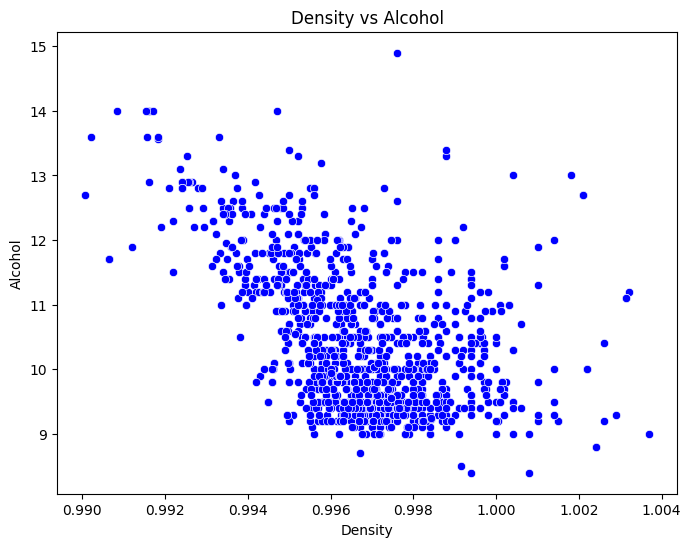

In [56]:
# Scatter plot of density vs alcohol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='alcohol', data=df, color='blue')
plt.title('Density vs Alcohol')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()


### The above graph shows that the higher the alcohol level, the lower is the density level

## Feature Engineering

### Introduction of new features like Acidity Ratio, Sulphur Balance and Sugar-Alcohol Ratio.

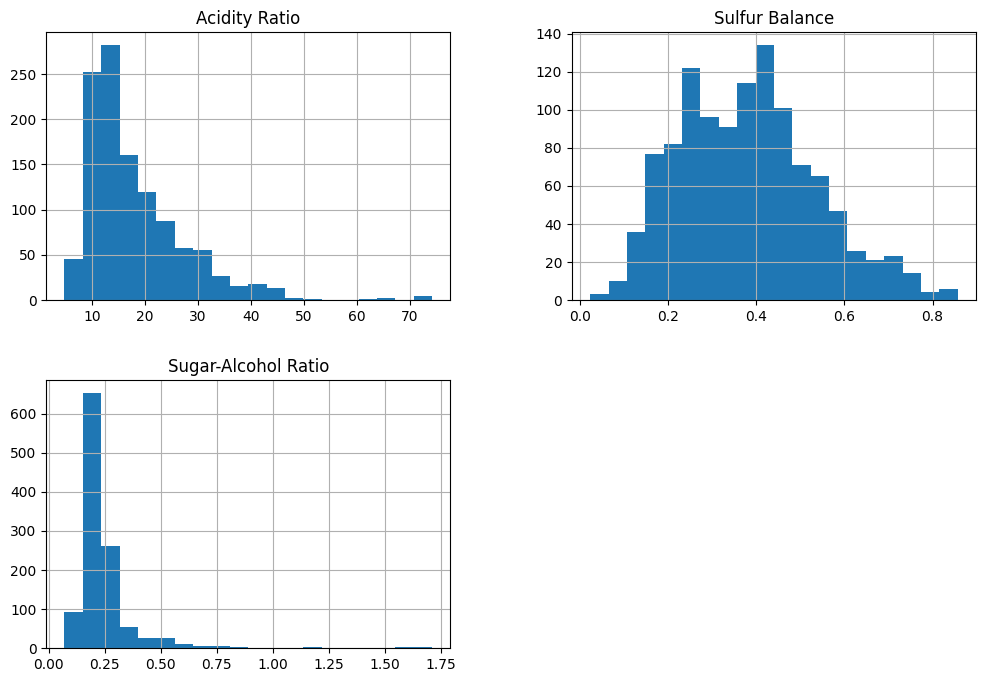

In [57]:
# Feature Engineering
df['Acidity Ratio'] = df['fixed acidity'] / df['volatile acidity']
df['Sulfur Balance'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
df['Sugar-Alcohol Ratio'] = df['residual sugar'] / df['alcohol']

# Plot the new features
df[['Acidity Ratio', 'Sulfur Balance', 'Sugar-Alcohol Ratio']].hist(figsize=(12, 8), bins=20)
plt.show()


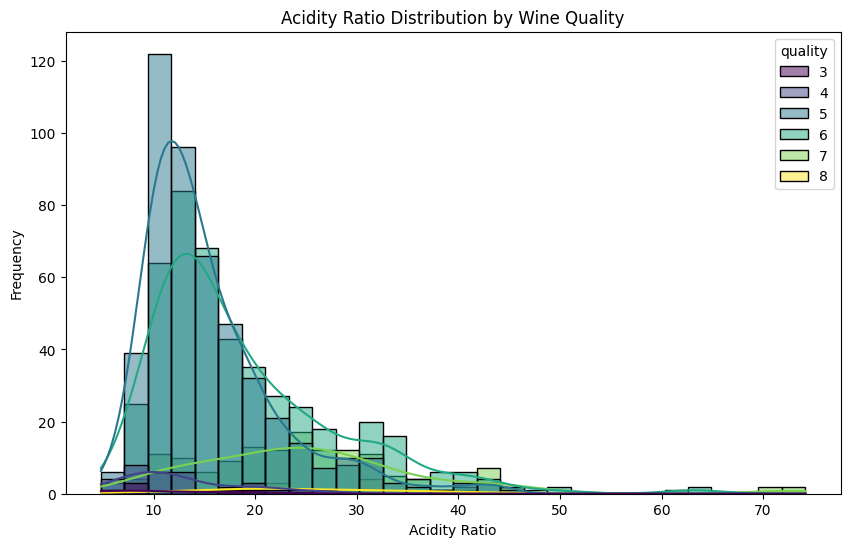

In [64]:
# Plotting the distribution of Acidity Ratio based on Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='acidity_ratio', hue='quality', kde=True, bins=30, palette='viridis')
plt.title('Acidity Ratio Distribution by Wine Quality')
plt.xlabel('Acidity Ratio')
plt.ylabel('Frequency')
plt.show()


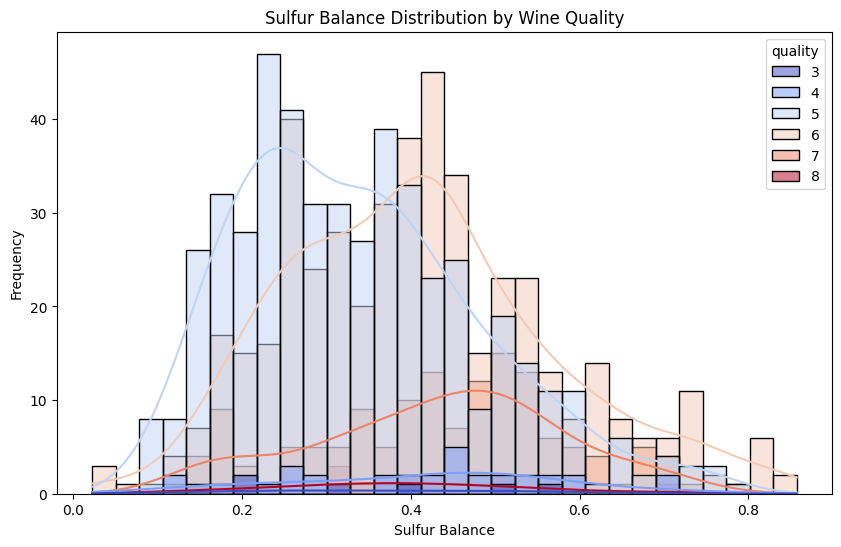

In [65]:
# Plotting the distribution of Sulfur Balance based on Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sulfur_balance', hue='quality', kde=True, bins=30, palette='coolwarm')
plt.title('Sulfur Balance Distribution by Wine Quality')
plt.xlabel('Sulfur Balance')
plt.ylabel('Frequency')
plt.show()


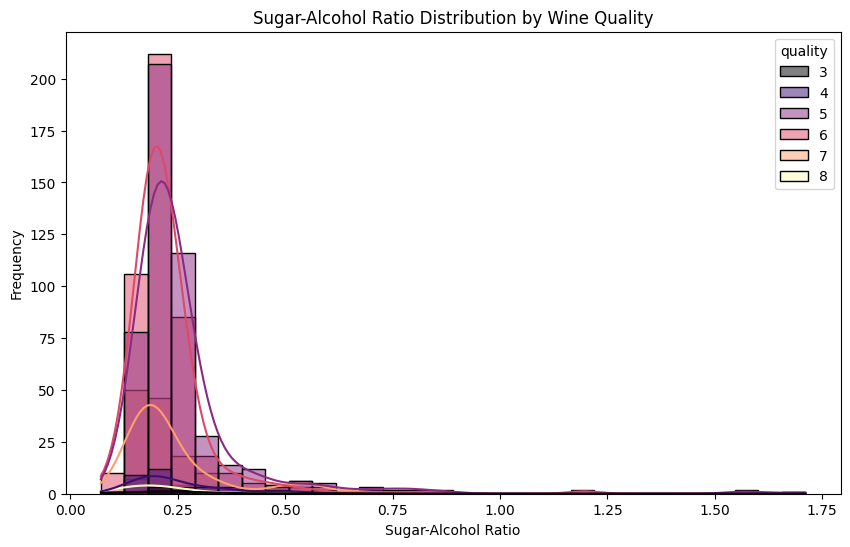

In [66]:
# Plotting the distribution of Sugar-Alcohol Ratio based on Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sugar_alcohol_ratio', hue='quality', kde=True, bins=30, palette='magma')
plt.title('Sugar-Alcohol Ratio Distribution by Wine Quality')
plt.xlabel('Sugar-Alcohol Ratio')
plt.ylabel('Frequency')
plt.show()


## Separation of columns to train the model

In [68]:
X = df[['alcohol', 'fixed acidity', 'pH', 'residual sugar', 'volatile acidity']]
y = df['quality'] 

In [69]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)##Converts 20% of the data to test data


In [72]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [34]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,quality_category,acidity_ratio,sulfur_balance,sugar_alcohol_ratio
1090,7.9,0.29,0.49,2.20,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,1528,Average,27.241379,0.355932,0.217822
956,11.5,0.42,0.48,2.60,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,1344,Average,27.380952,0.400000,0.236364
317,11.9,0.39,0.69,2.80,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,450,Average,30.512821,0.485714,0.259259
591,7.1,0.48,0.28,2.80,0.068,6.0,16.0,0.99682,3.24,0.53,10.3,824,Average,14.791667,0.375000,0.271845
729,8.7,0.41,0.41,6.20,0.078,25.0,42.0,0.99530,3.24,0.77,12.6,1038,Excellent,21.219512,0.595238,0.492063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,11.6,0.53,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,326,Excellent,21.886792,0.428571,0.317391
1007,6.2,0.58,0.00,1.60,0.065,8.0,18.0,0.99660,3.56,0.84,9.4,1415,Average,10.689655,0.444444,0.170213
950,6.0,0.50,0.00,1.40,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,1337,Average,12.000000,0.576923,0.147368
81,9.4,0.40,0.31,2.20,0.090,13.0,62.0,0.99660,3.07,0.63,10.5,115,Average,23.500000,0.209677,0.209524


### Random forest model uses different decision trees and according to the average of their results the final result is determined

In [35]:
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)


(914, 16)
(914,)


In [36]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [37]:
y_pred = clf.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro', 'micro', or 'weighted' as needed
print(f"F1-score: {f1}")

NameError: name 'y_pred' is not defined

In [ ]:
clf.fit(X_train, y_train)



ValueError: could not convert string to float: 'Excellent'

In [ ]:
X_test_accurcy = model.predict(X_test)
predction_accuracy=accuracy_score(X_test_accurcy,y_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [ ]:
print(predction_accuracy)

0.7641921397379913
